# 学习曲线

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5*x**2 + x + 2 + np.random.normal(0, 1, size=100)

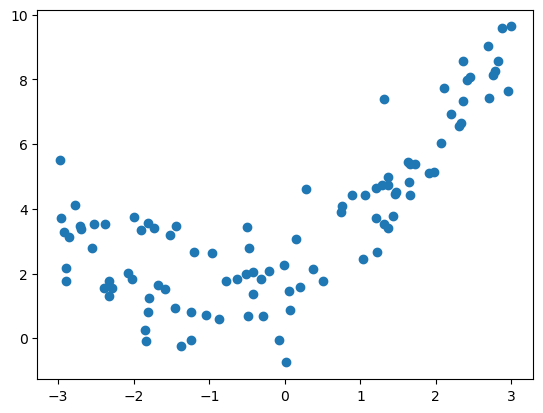

In [11]:
plt.scatter(X, y)


In [12]:
X[:5]

array([[1.20262273],
       [2.06511986],
       [1.05908602],
       [1.36714834],
       [2.70874774]])

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(X, y):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)+1):
        model = LinearRegression()
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_errors), 'r-+', linewidth=2, label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_errors), 'b-', linewidth=3, label="test")
    plt.legend()

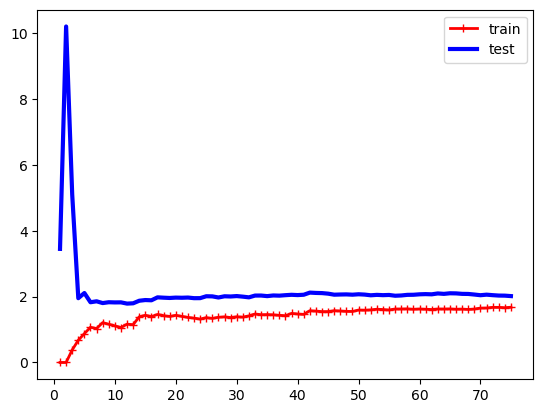

In [31]:
plot_learning_curves(X, y)

In [24]:
def plot_learning_curves_with_algo(X, y, algo= LinearRegression()):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)+1):
        algo.fit(X_train[:m], y_train[:m])
        y_train_predict = algo.predict(X_train[:m])
        y_test_predict = algo.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_errors), 'r-+', linewidth=2, label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_errors), 'b-', linewidth=3, label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
	return Pipeline([
		("poly", PolynomialFeatures(degree = degree)),
		("std_scaler", StandardScaler()), 
		("lin_reg", LinearRegression())
		])

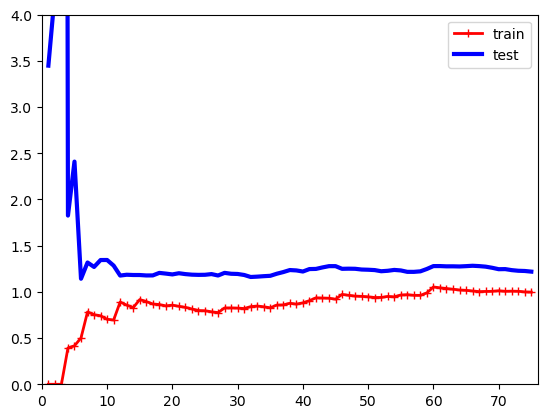

In [26]:
plot_learning_curves_with_algo(X, y, PolynomialRegression(degree=2))

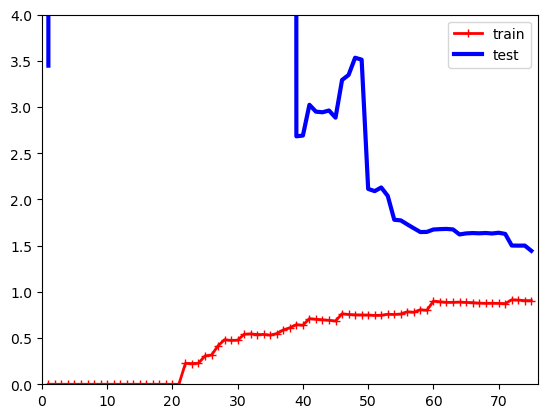

In [28]:
plot_learning_curves_with_algo(X, y, PolynomialRegression(degree=20))